In [4]:
import einsteinpy.symbolic as es
import einsteinpy as es2
import numpy as np
import sympy as sp
from itertools import product
from astropy import units as u

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [7]:
import sys
sys.path.append('/home/lldddv/Documentos/UdeA/Trabajo_de_grado/kerrpy/src')

In [12]:
%reload_ext autoreload
%autoreload 2

from kerrpy.symbolic.metrics.kerr_metric import Kerr

In [ ]:
g = Kerr().metric()

[[-R_s/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)) + 1, 0, 0, R_s*a*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1))], [0, -(a**2*cos(x^2)**2/x^1**2 + 1)/(1 - (R_s*x^1 + a**2)/x^1**2), 0, 0], [0, 0, -x^1**2*(a**2*cos(x^2)**2/x^1**2 + 1), 0], [R_s*a*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)), 0, 0, (-R_s*a**2*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)) - a**2 - x^1**2)*sin(x^2)**2]]

# Simbolico

In [ ]:
# coordinates
# x0, x1, x2, x3 = sp.symbols("x^0 x^1 x^2 x^3")
# xs = [x0, x1, x2, x3]

# # constant symbols
# G, c = sp.symbols("G c")

# # parameters
# M = sp.symbols("M")
# J = sp.symbols("J")

# # Derived parameters
# R_s = 2*G*M/c**2
# a = J/(M*c)
# R_s, a = sp.symbols("R_s a")

In [15]:
# Metric
# Sigma = xs[1]**2 * (1 + a**2/xs[1]**2 * sp.cos(xs[2])**2)
# Delta = xs[1]**2 * (1 - (R_s*xs[1] + a**2)/xs[1]**2)

# A = 1 - R_s*xs[1]/Sigma
# B = - Sigma/Delta
# C = - Sigma
# D = - (xs[1]**2 + a**2 + R_s*xs[1]*a**2/Sigma * sp.sin(xs[2])**2) * sp.sin(xs[2])**2
# E = 2*R_s*xs[1]*a/Sigma * sp.sin(xs[2])**2

# metric = np.diag([A, B, C, D])
# metric[0, 3] = metric[3, 0] = E/2
# metric_ = sp.Matrix(metric)

# g = es.MetricTensor(metric, xs)
# g.tensor()

In [18]:
kerr = Kerr()
g = kerr.metric()
g.tensor()

[[-R_s/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)) + 1, 0, 0, R_s*a*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1))], [0, -(a**2*cos(x^2)**2/x^1**2 + 1)/(1 - (R_s*x^1 + a**2)/x^1**2), 0, 0], [0, 0, -x^1**2*(a**2*cos(x^2)**2/x^1**2 + 1), 0], [R_s*a*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)), 0, 0, (-R_s*a**2*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)) - a**2 - x^1**2)*sin(x^2)**2]]

In [5]:
def get_u_t(g):
    v1, v2, v3 = sp.symbols("v1 v2 v3")
    vs = [0, v1, v2, v3]
    u_t2 = g[0,0]
    for i, j in product(range(1, 4), repeat=2):
        u_t2 += ( 2/c*g[0, i]*vs[i] + 1/c**2 * g[i, j]*vs[i]*vs[j])
    return sp.sqrt(c**2 / u_t2).simplify()
u_t = get_u_t(g)
u_t

sqrt(-c**4*x^1*(R_s - x^1)/(R_s*c**2*(R_s - x^1) - c**2*x^1*(R_s - x^1) - v1**2*x^1**2 + x^1**3*(R_s - x^1)*(v2**2 + v3**2*sin(x^2)**2)))

In [6]:
1/(np.sqrt(1 - 0.6**2)) * 299792458.0

np.float64(374740572.5)

In [27]:
christoffel = kerr.get_christoffel_symbols()
christoffel.tensor()

[[[0, -R_s*(a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - x^1**4)/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), -2*R_s*a**2*x^1*sin(2*x^2)/(a**2*cos(2*x^2) + a**2 + 2*x^1**2)**2, 0], [-R_s*(a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - x^1**4)/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), 0, 0, R_s*a*(a**4*cos(x^2)**2 - a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - 3*x^1**4)*sin(x^2)**2/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2))], [-2*R_s*a**2*x^1*sin(2*x^2)/(a**2*cos(2*x^2) + a**2 + 2*x^1**2)**2, 0, 0, R_s*a**3*x^1*sin(x^2)**3*cos(x^2)/(a**2*cos(x^2)**2 + x^1**2)**2], [0, R_s*a*(a**4*cos(x^2)**2 - a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - 3*x^1**4)*sin(x^2)**2/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), R_s*a**3*x^1*sin(x^2)**3*cos(x^2)/(a**2*cos(x^2)**2 + x^1**2)**2, 0]], [[R_s*(a**2*cos(x^2)**2 - x^1**2)*(R_s*x^1 + a**2 - x^1**2)/(2*(a**2*cos(x^2)**2 + x^1**2)**3), 0, 0, -R_s*a*(a**2*cos(x^2)**

In [22]:
christoffel_ = es.ChristoffelSymbols.from_metric(g)
christoffel_.tensor()

[[[0, R_s*a*x^1*(2*R_s*a**3*sin(x^2)**2*cos(x^2)**2/(x^1**4*(a**2*cos(x^2)**2/x^1**2 + 1)**2) - R_s*a*sin(x^2)**2/(x^1**2*(a**2*cos(x^2)**2/x^1**2 + 1)))/(2*(R_s*a**2*x^1*sin(x^2)**2 - R_s*a**2*x^1 - R_s*x^1**3 + a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 + a**2*x^1**2 + x^1**4)) + (-2*R_s*a**2*cos(x^2)**2/(x^1**4*(a**2*cos(x^2)**2/x^1**2 + 1)**2) + R_s/(x^1**2*(a**2*cos(x^2)**2/x^1**2 + 1)))*(R_s*a**2*x^1*sin(x^2)**2 + a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 + a**2*x^1**2 + x^1**4)/(2*(R_s*a**2*x^1*sin(x^2)**2 - R_s*a**2*x^1 - R_s*x^1**3 + a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 + a**2*x^1**2 + x^1**4)), -R_s*a**2*(R_s*a**2*x^1*sin(x^2)**2 + a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 + a**2*x^1**2 + x^1**4)*sin(x^2)*cos(x^2)/(x^1**3*(a**2*cos(x^2)**2/x^1**2 + 1)**2*(R_s*a**2*x^1*sin(x^2)**2 - R_s*a**2*x^1 - R_s*x^1**3 + a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 + a**2*x^1**2 + x^1**4)) + R_s*a*x^1*(2*R_s*a**3*sin(x^2)**3*cos(x^2)/(x^1**3*(a**2*cos(x^2)**2/x^1**2 + 1)**2) + 2*R_

In [ ]:
simplify = lambda exp: exp.expand().simplify()
chs = christoffel_.tensor().simplify()


AttributeError: 'MetricTensor' object has no attribute 'coords'

In [28]:
chs2 = es.ChristoffelSymbols(chs, xs)
chs2.tensor()

[[[0, -R_s*(a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - x^1**4)/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), -2*R_s*a**2*x^1*sin(2*x^2)/(a**2*cos(2*x^2) + a**2 + 2*x^1**2)**2, 0], [-R_s*(a**4*cos(x^2)**2 + a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - x^1**4)/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), 0, 0, R_s*a*(a**4*cos(x^2)**2 - a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - 3*x^1**4)*sin(x^2)**2/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2))], [-2*R_s*a**2*x^1*sin(2*x^2)/(a**2*cos(2*x^2) + a**2 + 2*x^1**2)**2, 0, 0, R_s*a**3*x^1*sin(x^2)**3*cos(x^2)/(a**2*cos(x^2)**2 + x^1**2)**2], [0, R_s*a*(a**4*cos(x^2)**2 - a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - 3*x^1**4)*sin(x^2)**2/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), R_s*a**3*x^1*sin(x^2)**3*cos(x^2)/(a**2*cos(x^2)**2 + x^1**2)**2, 0]], [[R_s*(a**2*cos(x^2)**2 - x^1**2)*(R_s*x^1 + a**2 - x^1**2)/(2*(a**2*cos(x^2)**2 + x^1**2)**3), 0, 0, -R_s*a*(a**2*cos(x^2)**

In [7]:
subs = {}

main_subs = {
    sp.sin(x2): "s_x2",
    sp.cos(x2): "c_x2",
    sp.tan(x2): "t_x2",
    sp.sin(2*x2): "s_2x2",
    sp.cos(2*x2): "c_2x2",
    sp.tan(2*x2): "t_2x2",
    sp.sin(4*x2): "s_4x2",
    sp.cos(4*x2): "c_4x2",
    sp.tan(4*x2): "t_4x2",
    a: "a",
    R_s: "R_s",
    x2: "x2",
    x1: "x1",
}
    

for key, value in main_subs.items():
    for exponent in range(1, 8)[::-1]:
        subs[key**exponent] = value + f"_{exponent}" if exponent > 1 else value

second_subs = {
    sp.symbols("x1_2")**2: "x1_4",
    sp.symbols("x1_2")**3: "x1_6",
    sp.symbols("x2_2")**2: "x2_4",
    sp.symbols("x2_2")**3: "x2_6",
    sp.symbols("a_2")**2: "a_4",
    sp.symbols("a_2")**3: "a_6",
    sp.symbols("s_x2_2")**2: "s_x2_4",
    sp.symbols("c_x2_2")**2: "c_x2_4",
    sp.symbols("t_x2_2")**2: "t_x2_4"
}


In [39]:
christoffel_simplified = np.zeros((4, 4, 4), dtype=object)

for mu, nu, sigma in product(range(4), repeat=3):
    expr = simplify(christoffel_.tensor()[mu, nu, sigma])#.subs(subs).subs(second_subs)
    christoffel_simplified[mu, nu, sigma] = expr

# christoffel_simplified = sp.MutableDenseNDimArray(
#     christoffel_simplified,
#     (4, 4, 4)
# )
# christoffel_simplified_

In [40]:
ch3 = es.ChristoffelSymbols(christoffel_simplified, xs)
ch3.tensor()

[[[0, R_s*(a**4*sin(x^2)**2 - a**4 + a**2*x^1**2*sin(x^2)**2 + x^1**4)/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), -2*R_s*a**2*x^1*sin(2*x^2)/(a**2*cos(2*x^2) + a**2 + 2*x^1**2)**2, 0], [R_s*(a**4*sin(x^2)**2 - a**4 + a**2*x^1**2*sin(x^2)**2 + x^1**4)/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), 0, 0, R_s*a*(a**4*cos(x^2)**2 - a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - 3*x^1**4)*sin(x^2)**2/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2))], [-2*R_s*a**2*x^1*sin(2*x^2)/(a**2*cos(2*x^2) + a**2 + 2*x^1**2)**2, 0, 0, R_s*a**3*x^1*sin(x^2)**3*cos(x^2)/(a**2*cos(x^2)**2 + x^1**2)**2], [0, R_s*a*(a**4*cos(x^2)**2 - a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 - 3*x^1**4)*sin(x^2)**2/(2*(a**2*cos(x^2)**2 + x^1**2)**2*(-R_s*x^1 + a**2 + x^1**2)), R_s*a**3*x^1*sin(x^2)**3*cos(x^2)/(a**2*cos(x^2)**2 + x^1**2)**2, 0]], [[R_s*(R_s*a**2*x^1*cos(x^2)**2 - R_s*x^1**3 + a**4*cos(x^2)**2 - a**2*x^1**2*cos(x^2)**2 - a**2*x^1**2 + x^1**4)/(2*(a**2*cos(x^2)**2 + x^1*

In [9]:
for mu in range(4):
    print("    # mu =", mu)
    for nu in range(4):
        for sigma in range(4):
            if sigma >= nu:
                print(f"    Gamma[{mu}, {nu}, {sigma}] =", christoffel_simplified[mu, nu, sigma])
    
    print("")
    for nu in range(4):
        for sigma in range(4):
            if sigma < nu:
                print(f"    Gamma[{mu}, {nu}, {sigma}] = Gamma[{mu}, {sigma}, {nu}]")
    
    print("\n")

    # mu = 0
    Gamma[0, 0, 0] = 0
    Gamma[0, 0, 1] = R_s*(a_2*s_x2_2*x1_2 + a_4*s_x2_2 - a_4 + x1_4)/(2*(a_2*c_x2_2 + x1_2)**2*(-R_s*x1 + a_2 + x1_2))
    Gamma[0, 0, 2] = -2*R_s*a_2*s_2x2*x1/(a_2*c_2x2 + a_2 + 2*x1_2)**2
    Gamma[0, 0, 3] = 0
    Gamma[0, 1, 1] = 0
    Gamma[0, 1, 2] = 0
    Gamma[0, 1, 3] = R_s*a*s_x2_2*(-a_2*c_x2_2*x1_2 - a_2*x1_2 + a_4*c_x2_2 - 3*x1_4)/(2*(a_2*c_x2_2 + x1_2)**2*(-R_s*x1 + a_2 + x1_2))
    Gamma[0, 2, 2] = 0
    Gamma[0, 2, 3] = R_s*a_3*c_x2*s_x2_3*x1/(a_2*c_x2_2 + x1_2)**2
    Gamma[0, 3, 3] = 0

    Gamma[0, 1, 0] = Gamma[0, 0, 1]
    Gamma[0, 2, 0] = Gamma[0, 0, 2]
    Gamma[0, 2, 1] = Gamma[0, 1, 2]
    Gamma[0, 3, 0] = Gamma[0, 0, 3]
    Gamma[0, 3, 1] = Gamma[0, 1, 3]
    Gamma[0, 3, 2] = Gamma[0, 2, 3]


    # mu = 1
    Gamma[1, 0, 0] = R_s*(R_s*a_2*c_x2_2*x1 - R_s*x1_3 - a_2*c_x2_2*x1_2 - a_2*x1_2 + a_4*c_x2_2 + x1_4)/(2*(a_2*c_x2_2 + x1_2)**3)
    Gamma[1, 0, 1] = 0
    Gamma[1, 0, 2] = 0
    Gamma[1, 0, 3] = R_s*a*s_x2_2*(-R_s*a_2*c_

# Numérico

In [10]:
m = 1
km = 1e3 * m

s = 1

kg = 1

G = 6.67430e-11 * m**3 / (kg * s**2)
c = 3e8 * m/s
def calculate_Christoffel(M, a, x0, x1, x2, x3):
    R_s = 2*G*M/c**2
    ############### Auxiliary variables ##############

    ##### R_s #####
    # R_s = R_s
    R_s_2 = R_s*R_s

    ##### a #####
    # a = a
    a_2 = a*a
    a_3 = a_2*a
    a_4 = a_3*a
    a_5 = a_4*a
    a_6 = a_5*a

    ##### x1 #####
    # x1 = x1
    x1_2 = x1*x1
    x1_3 = x1_2*x1
    x1_4 = x1_3*x1
    x1_5 = x1_4*x1
    x1_6 = x1_5*x1
    x1_7 = x1_6*x1

    ##### x2 #####
    # x2 = x2
    s_x2 = np.sin(x2)
    c_x2 = np.cos(x2)
    t_x2 = np.tan(x2)

    s_x2_2 = s_x2*s_x2
    c_x2_2 = c_x2*c_x2

    s_x2_3 = s_x2_2*s_x2
    # c_x2_3 = c_x2_2*c_x2

    s_x2_4 = s_x2_2*s_x2_2
    c_x2_4 = c_x2_2*c_x2_2

    s_2x2 = np.sin(2*x2)
    c_2x2 = np.cos(2*x2)

    c_4x2 = np.cos(4*x2)
    
    ##################################################

    # Inicializamos la matriz de Christoffel
    Gamma = np.zeros((4, 4, 4))

    ######## Pegar aquí el contenido generado ########

    # mu = 0
    Gamma[0, 0, 0] = 0
    Gamma[0, 0, 1] = R_s*(a_2*s_x2_2*x1_2 + a_4*s_x2_2 - a_4 + x1_4)/(2*(a_2*c_x2_2 + x1_2)**2*(-R_s*x1 + a_2 + x1_2))
    Gamma[0, 0, 2] = -2*R_s*a_2*s_2x2*x1/(a_2*c_2x2 + a_2 + 2*x1_2)**2
    Gamma[0, 0, 3] = 0
    Gamma[0, 1, 1] = 0
    Gamma[0, 1, 2] = 0
    Gamma[0, 1, 3] = R_s*a*s_x2_2*(-a_2*c_x2_2*x1_2 - a_2*x1_2 + a_4*c_x2_2 - 3*x1_4)/(2*(a_2*c_x2_2 + x1_2)**2*(-R_s*x1 + a_2 + x1_2))
    Gamma[0, 2, 2] = 0
    Gamma[0, 2, 3] = R_s*a_3*c_x2*s_x2_3*x1/(a_2*c_x2_2 + x1_2)**2
    Gamma[0, 3, 3] = 0

    Gamma[0, 1, 0] = Gamma[0, 0, 1]
    Gamma[0, 2, 0] = Gamma[0, 0, 2]
    Gamma[0, 2, 1] = Gamma[0, 1, 2]
    Gamma[0, 3, 0] = Gamma[0, 0, 3]
    Gamma[0, 3, 1] = Gamma[0, 1, 3]
    Gamma[0, 3, 2] = Gamma[0, 2, 3]


    # mu = 1
    Gamma[1, 0, 0] = R_s*(R_s*a_2*c_x2_2*x1 - R_s*x1_3 - a_2*c_x2_2*x1_2 - a_2*x1_2 + a_4*c_x2_2 + x1_4)/(2*(a_2*c_x2_2 + x1_2)**3)
    Gamma[1, 0, 1] = 0
    Gamma[1, 0, 2] = 0
    Gamma[1, 0, 3] = R_s*a*s_x2_2*(-R_s*a_2*c_x2_2*x1 + R_s*x1_3 + a_2*c_x2_2*x1_2 + a_2*x1_2 - a_4*c_x2_2 - x1_4)/(2*(a_2*c_x2_2 + x1_2)**3)
    Gamma[1, 1, 1] = (-R_s*a_2*c_x2_2/2 + R_s*x1_2/2 + a_2*c_x2_2*x1 + a_2*x1)/(R_s*a_2*c_x2_2*x1 + R_s*x1_3 - a_2*c_x2_2*x1_2 + a_2*x1_2 + a_4*c_x2_2 - x1_4)
    Gamma[1, 1, 2] = -a_2*s_2x2/(a_2*c_2x2 + a_2 + 2*x1_2)
    Gamma[1, 1, 3] = 0
    Gamma[1, 2, 2] = x1*(R_s*x1 + a_2 - x1_2)/(a_2*c_x2_2 + x1_2)
    Gamma[1, 2, 3] = 0
    Gamma[1, 3, 3] = s_x2_2*(2*R_s*a_2*c_x2_2*x1_4 + R_s*a_2*s_x2_2*x1_4/2 + R_s*a_4*c_x2_4*x1_2 - R_s*a_4*s_x2_2*x1_2/2 - R_s*a_4*x1_2*(1 - c_4x2)/16 + R_s*a_6*(1 - c_4x2)/16 + R_s*x1_6 - R_s_2*a_2*s_x2_2*x1_3/2 + R_s_2*a_4*x1*(1 - c_4x2)/16 - 2*a_2*c_x2_2*x1_5 + a_2*x1_5 + 2*a_4*c_x2_2*x1_3 - a_4*c_x2_4*x1_3 + a_6*c_x2_4*x1 - x1_7)/(a_2*c_x2_2 + x1_2)**3

    Gamma[1, 1, 0] = Gamma[1, 0, 1]
    Gamma[1, 2, 0] = Gamma[1, 0, 2]
    Gamma[1, 2, 1] = Gamma[1, 1, 2]
    Gamma[1, 3, 0] = Gamma[1, 0, 3]
    Gamma[1, 3, 1] = Gamma[1, 1, 3]
    Gamma[1, 3, 2] = Gamma[1, 2, 3]


    # mu = 2
    Gamma[2, 0, 0] = -4*R_s*a_2*s_2x2*x1/(a_2*c_2x2 + a_2 + 2*x1_2)**3
    Gamma[2, 0, 1] = 0
    Gamma[2, 0, 2] = 0
    Gamma[2, 0, 3] = 4*R_s*a*s_2x2*x1*(a_2 + x1_2)/(a_2*c_2x2 + a_2 + 2*x1_2)**3
    Gamma[2, 1, 1] = -a_2*c_x2*s_x2/(R_s*a_2*c_x2_2*x1 + R_s*x1_3 - a_2*c_x2_2*x1_2 + a_2*x1_2 + a_4*c_x2_2 - x1_4)
    Gamma[2, 1, 2] = x1/(a_2*c_x2_2 + x1_2)
    Gamma[2, 1, 3] = 0
    Gamma[2, 2, 2] = -a_2*s_2x2/(a_2*c_2x2 + a_2 + 2*x1_2)
    Gamma[2, 2, 3] = 0
    Gamma[2, 3, 3] = c_x2*s_x2*(-2*R_s*a_2*s_x2_2*x1_3 - R_s*a_4*s_x2_4*x1 - R_s*a_4*x1*(1 - c_4x2)/4 - 2*a_2*c_x2_2*x1_4 - a_2*x1_4 - 2*a_4*c_x2_2*x1_2 - a_4*c_x2_4*x1_2 - a_6*c_x2_4 - x1_6)/(a_2*c_x2_2 + x1_2)**3

    Gamma[2, 1, 0] = Gamma[2, 0, 1]
    Gamma[2, 2, 0] = Gamma[2, 0, 2]
    Gamma[2, 2, 1] = Gamma[2, 1, 2]
    Gamma[2, 3, 0] = Gamma[2, 0, 3]
    Gamma[2, 3, 1] = Gamma[2, 1, 3]
    Gamma[2, 3, 2] = Gamma[2, 2, 3]


    # mu = 3
    Gamma[3, 0, 0] = 0
    Gamma[3, 0, 1] = R_s*a*(-a_2*c_x2_2 + x1_2)/(2*(a_2*c_x2_2 + x1_2)**2*(-R_s*x1 + a_2 + x1_2))
    Gamma[3, 0, 2] = -R_s*a*x1/(t_x2*(a_2*c_x2_2 + x1_2)**2)
    Gamma[3, 0, 3] = 0
    Gamma[3, 1, 1] = 0
    Gamma[3, 1, 2] = 0
    Gamma[3, 1, 3] = (-R_s*a_2*c_x2_2*x1_2 - R_s*a_2*s_x2_2*x1_2/2 + R_s*a_4*(1 - c_4x2)/16 - R_s*x1_4 + 2*a_2*c_x2_2*x1_3 + a_4*c_x2_4*x1 + x1_5)/((a_2*c_x2_2 + x1_2)**2*(-R_s*x1 + a_2 + x1_2))
    Gamma[3, 2, 2] = 0
    Gamma[3, 2, 3] = (R_s*a_2*s_x2_2*x1 - 2*a_2*s_x2_2*x1_2 + 2*a_2*x1_2 - 2*a_4*s_x2_2 + a_4*s_x2_4 + a_4 + x1_4)/(t_x2*(2*a_2*c_x2_2*x1_2 + a_4*c_x2_4 + x1_4))
    Gamma[3, 3, 3] = 0

    Gamma[3, 1, 0] = Gamma[3, 0, 1]
    Gamma[3, 2, 0] = Gamma[3, 0, 2]
    Gamma[3, 2, 1] = Gamma[3, 1, 2]
    Gamma[3, 3, 0] = Gamma[3, 0, 3]
    Gamma[3, 3, 1] = Gamma[3, 1, 3]
    Gamma[3, 3, 2] = Gamma[3, 2, 3]


    ##################################################

    return Gamma


In [11]:
def symbolic_christoffel(Mass, a_, x0_, x1_, x2_, x3_):
    R_s_ = 2*G*Mass/c**2
    
    christoffel = np.zeros((4, 4, 4), dtype=object)

    for mu in range(4):
        for nu in range(4):
            for sigma in range(4):
                christoffel[mu, nu, sigma] = chs[mu, nu, sigma].subs({R_s: R_s_, a: a_, x0: x0_, x1: x1_, x2: x2_, x3: x3_}).evalf()

    return christoffel

In [12]:
# test con chat-GPT

def kerr_metric(coords, M, a):
    t, r, th, phi = coords
    Sigma = r**2 + (a*jnp.cos(th))**2
    Delta = r**2 - 2*M*r + a**2

    g = jnp.zeros((4,4))
    g = g.at[0,0].set(-(1 - 2*M*r/Sigma))
    g = g.at[0,3].set(-2*M*a*r*jnp.sin(th)**2 / Sigma)
    g = g.at[3,0].set(g[0,3])
    g = g.at[1,1].set(Sigma / Delta)
    g = g.at[2,2].set(Sigma)
    g = g.at[3,3].set((r**2 + a**2 + (2*M*a**2*r*jnp.sin(th)**2)/Sigma)*jnp.sin(th)**2)
    return g

def christoffel(Mass, a, x1, x2, x3, x4):
    M = 2*G*Mass/c**2
    coords = jnp.array([x1, x2, x3, x4])
    g = kerr_metric(coords, M, a)
    g_inv = jnp.linalg.inv(g)

    def g_comp(i,j):
        return lambda x: kerr_metric(x, M, a)[i,j]

    Gamma = jnp.zeros((4,4,4))
    for mu in range(4):
        for alpha in range(4):
            for beta in range(4):
                s = 0.0
                for nu in range(4):
                    dg_alpha = jax.grad(lambda x: g_comp(nu,beta)(x))(coords)[alpha]
                    dg_beta  = jax.grad(lambda x: g_comp(nu,alpha)(x))(coords)[beta]
                    dg_nu    = jax.grad(lambda x: g_comp(alpha,beta)(x))(coords)[nu]
                    s += g_inv[mu,nu] * (dg_alpha + dg_beta - dg_nu)
                Gamma = Gamma.at[mu,alpha,beta].set(0.5 * s)
    return Gamma

In [13]:
# test
# 100 random values of R_s, a, x0, x1, x2, x3
N = 100

Masss = np.random.uniform(0.1, 10, N)
as_ = np.random.uniform(0.1, 10, N)
x0s = np.random.uniform(0.1, 10, N)
x1s = np.random.uniform(0.1, 10, N)
x2s = np.random.uniform(0.1, np.pi/2, N)
x3s = np.random.uniform(0.1, 10, N)

# calculate_Christoffel
results = np.zeros((N, 4, 4, 4))
my_results = np.zeros((N, 4, 4, 4))
for i in range(N):
    results[i] = symbolic_christoffel(Masss[i], as_[i], x0s[i], x1s[i], x2s[i], x3s[i])
    my_results[i] = calculate_Christoffel(Masss[i], as_[i], x0s[i], x1s[i], x2s[i], x3s[i])

np.isclose(results, my_results).all()

np.True_

In [14]:
# # test con chat-GPT
# N = 3
# Masss = np.random.uniform(0.1, 10, N)
# as_ = np.random.uniform(0.1, 10, N)
# x0s = np.random.uniform(0.1, 10, N)
# x1s = np.random.uniform(0.1, 10, N)
# x2s = np.random.uniform(0.1, np.pi/2, N)
# x3s = np.random.uniform(0.1, 10, N)

# # calculate_Christoffel
# results = np.zeros((N, 4, 4, 4))
# my_results = np.zeros((N, 4, 4, 4))
# for i in range(N):
#     results[i] = christoffel(Masss[i], as_[i], x0s[i], x1s[i], x2s[i], x3s[i])
#     my_results[i] = calculate_Christoffel(Masss[i], as_[i], x0s[i], x1s[i], x2s[i], x3s[i])

# np.isclose(results, my_results).all()

In [15]:
# import numpy as np
# import astropy.units as u
# from einsteinpy.coordinates import BoyerLindquistDifferential
# from einsteinpy.metric import Kerr

# def get_Gamma(Mass, a, x0, x1, x2, x3):
#     Mass = Mass * u.kg
#     a = a * u.one
    
#     # Coordenadas diferenciales (posición + velocidades)
#     coords = BoyerLindquistDifferential(
#         t=x0 * u.s,
#         r=x1 * u.km,
#         theta=x2 * u.rad,
#         phi=x3 * u.rad,
#         v_r=0.0 * u.km/u.s,
#         v_th=0.0 * u.rad/u.s,
#         v_p=0.0 * u.rad/u.s
#     )

#     # Métrica de Kerr
#     kerr = Kerr(coords=coords, M=Mass, a=a)

#     # Christoffel en el punto (t, r, θ, φ)
#     Gamma = kerr.christoffels([x0, x1, x2, x3])

#     return Gamma

# def geodesic_equations(t, y, Mass, a):
#     Mass = Mass * u.kg
#     a = a * u.one
    
#     # Coordenadas diferenciales (posición + velocidades)
#     coords = BoyerLindquistDifferential(
#         t=x0 * u.s,
#         r=x1 * u.km,
#         theta=x2 * u.rad,
#         phi=x3 * u.rad,
#         v_r=0.0 * u.km/u.s,
#         v_th=0.0 * u.rad/u.s,
#         v_p=0.0 * u.rad/u.s
#     )

#     # Métrica de Kerr
#     kerr = Kerr(coords=coords, M=Mass, a=a)

#     geodesic = kerr.calculate_trajectory()
#     return kerr

# k = geodesic_equations(0, [0, 10000, np.pi/6, 0, 0, 0, 0, 0], 4.2e6 * 1.989e30, 0.1)
# es2.geodesic

In [16]:
Mass = 4.2e6 * 1.989e30  # kg
a = 0.1

x0 = 0
x1 = 10000
x2 = np.pi/6
x3 = 0

np.isclose(get_Gamma(Mass, a, x0, x1, x2, x3), calculate_Christoffel(Mass, a, x0, x1, x2, x3))

NameError: name 'get_Gamma' is not defined

In [ ]:
get_Gamma(Mass, a, x0, x1, x2, x3)

array([[[ 0.00000000e+00, -2.14996000e-08, -2.48175962e-04,
          0.00000000e+00],
        [-2.14996000e-08,  0.00000000e+00,  0.00000000e+00,
          1.11247794e-08],
        [-2.48175962e-04,  0.00000000e+00,  0.00000000e+00,
          1.28388880e-04],
        [ 0.00000000e+00,  1.11247794e-08,  1.28388880e-04,
          0.00000000e+00]],

       [[-2.57472264e+09,  0.00000000e+00,  0.00000000e+00,
          1.33198137e+09],
        [ 0.00000000e+00,  1.61247087e-08, -5.77350269e-01,
          0.00000000e+00],
        [ 0.00000000e+00, -5.77350269e-01, -1.33290348e+04,
          0.00000000e+00],
        [ 1.33198137e+09,  0.00000000e+00,  0.00000000e+00,
          6.89070641e+08]],

       [[-7.72757223e-05,  0.00000000e+00,  0.00000000e+00,
          1.59908210e-04],
        [ 0.00000000e+00,  1.50066110e-18,  3.46451107e-14,
          0.00000000e+00],
        [ 0.00000000e+00,  3.46451107e-14, -5.77350269e-01,
          0.00000000e+00],
        [ 1.59908210e-04,  0.00000000e+

In [ ]:
calculate_Christoffel(Mass, a, x0, x1, x2, x3)

array([[[ 0.00000000e+00, -5.00000403e-05, -5.36510121e-05,
          0.00000000e+00],
        [-5.00000403e-05,  0.00000000e+00,  0.00000000e+00,
          3.75000303e-06],
        [-5.36510121e-05,  0.00000000e+00,  0.00000000e+00,
          1.34127530e-06],
        [ 0.00000000e+00,  3.75000303e-06,  1.34127530e-06,
          0.00000000e+00]],

       [[-7.67581008e+07,  0.00000000e+00,  0.00000000e+00,
          1.91895252e+06],
        [ 0.00000000e+00,  5.00000403e-05, -4.33012702e-11,
          0.00000000e+00],
        [ 0.00000000e+00, -4.33012702e-11,  1.23901605e+10,
          0.00000000e+00],
        [ 1.91895252e+06,  0.00000000e+00,  0.00000000e+00,
          3.09749216e+09]],

       [[-5.36510121e-13,  0.00000000e+00,  0.00000000e+00,
          5.36510121e-04],
        [ 0.00000000e+00, -3.49481107e-25,  1.00000000e-04,
          0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e-04, -4.33012702e-11,
          0.00000000e+00],
        [ 5.36510121e-04,  0.00000000e+

In [ ]:
from scipy.integrate import solve_ivp

def model_geodesic(t, ys0, Mass, a):
    xs0 = ys0[:4]
    vs0 = ys0[4:]
    as0 = np.zeros(4)

    chris = calculate_Christoffel(Mass, a, *xs0)

    for sigma, mu, nu in product(range(4), repeat=3):
        as0[sigma] += chris[sigma, mu, nu] * vs0[mu] * vs0[nu]

    return np.concatenate([vs0, as0])

def calculate_geodesic(taus, ys0, Mass, a):
    t_span = (taus[0], taus[-1])
    sol = solve_ivp(model_geodesic, t_span, ys0, args=(Mass, a), t_eval=taus)
    return sol


In [5]:
def bl_to_cartesian(alpha, t, r, th, p, v_r, v_th, v_p):
    """
    Utility function (jitted) to convert bl to cartesian.
    This function should eventually result in Coordinate Transformation Graph!

    """
    xa = np.sqrt(r**2 + alpha**2)
    sin_norm = xa * np.sin(th)
    x = sin_norm * np.cos(p)
    y = sin_norm * np.sin(p)
    z = r * np.cos(th)
    v_x = (
        (r * v_r * np.sin(th) * np.cos(p) / xa)
        + (xa * np.cos(th) * np.cos(p) * v_th)
        - (xa * np.sin(th) * np.sin(p) * v_p)
    )
    v_y = (
        (r * v_r * np.sin(th) * np.sin(p) / xa)
        + (xa * np.cos(th) * np.sin(p) * v_th)
        + (xa * np.sin(th) * np.cos(p) * v_p)
    )
    v_z = (v_r * np.cos(th)) - (r * np.sin(th) * v_th)

    return np.array([t, x, y, z, v_x, v_y, v_z])

def cartesian_to_bl(alpha, t, x, y, z, v_x, v_y, v_z):
    """
    Utility function (jitted) to convert cartesian to boyer lindquist.
    This function should eventually result in Coordinate Transformation Graph!

    """
    w = (x**2 + y**2 + z**2) - (alpha**2)
    r = np.sqrt(0.5 * (w + np.sqrt((w**2) + (4 * (alpha**2) * (z**2)))))
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    dw_dt = 2 * (x * v_x + y * v_y + z * v_z)
    v_r = (1 / (2 * r)) * (
        (dw_dt / 2)
        + (
            (w * dw_dt + 4 * (alpha**2) * z * v_z)
            / (2 * np.sqrt((w**2) + (4 * (alpha**2) * (z**2))))
        )
    )
    v_th = (-1 / np.sqrt(1 - np.square(z / r))) * ((v_z * r - v_r * z) / (r**2))
    v_p = (1 / (1 + np.square(y / x))) * ((v_y * x - v_x * y) / (x**2))


    return np.array([t, r, theta, phi, v_r, v_th, v_p])

In [ ]:
import numpy as np
from kerrpy.numeric.constants import _c, _G

def si_to_geo_t(t_SI):
    return _c * t_SI   # s -> m

def geo_to_si_t(t_geo):
    return t_geo / _c  # m -> s

def si_to_geo_v(v_SI):
    return v_SI / _c   # m/s -> adimensional

def geo_to_si_v(v_geo):
    return v_geo * _c  # adimensional -> m/s


def bl_to_cartesian(alpha_geo, t_SI, r_SI, th, p, v_r_SI, v_th_SI, v_p_SI):
    """
    BL -> Cartesian. 
    Input: SI (t en s, r en m, velocidades en m/s).
    Interno: convierte a geométricas.
    Output: Cartesian en SI.
    """
    # convertir a geométricas
    t_geo = si_to_geo_t(t_SI)
    r = r_SI
    v_r = si_to_geo_v(v_r_SI)
    v_th = si_to_geo_v(v_th_SI)
    v_p = si_to_geo_v(v_p_SI)

    xa = np.sqrt(r**2 + alpha_geo**2)
    sin_norm = xa * np.sin(th)

    x = sin_norm * np.cos(p)
    y = sin_norm * np.sin(p)
    z = r * np.cos(th)

    v_x = (
        (r * v_r * np.sin(th) * np.cos(p) / xa)
        + (xa * np.cos(th) * np.cos(p) * v_th)
        - (xa * np.sin(th) * np.sin(p) * v_p)
    )
    v_y = (
        (r * v_r * np.sin(th) * np.sin(p) / xa)
        + (xa * np.cos(th) * np.sin(p) * v_th)
        + (xa * np.sin(th) * np.cos(p) * v_p)
    )
    v_z = (v_r * np.cos(th)) - (r * np.sin(th) * v_th)

    # regresar a SI
    return np.array([
        geo_to_si_t(t_geo),
        x, y, z,
        geo_to_si_v(v_x),
        geo_to_si_v(v_y),
        geo_to_si_v(v_z)
    ])


def cartesian_to_bl(alpha_geo, t_SI, x, y, z, v_x_SI, v_y_SI, v_z_SI):
    """
    Cartesian -> BL.
    Input: Cartesian en SI.
    Interno: convierte a geométricas.
    Output: BL con t en s, r en m, velocidades en m/s.
    """
    # convertir a geométricas
    t_geo = si_to_geo_t(t_SI)
    v_x = si_to_geo_v(v_x_SI)
    v_y = si_to_geo_v(v_y_SI)
    v_z = si_to_geo_v(v_z_SI)

    w = (x**2 + y**2 + z**2) - (alpha_geo**2)
    r = np.sqrt(0.5 * (w + np.sqrt((w**2) + (4 * (alpha_geo**2) * (z**2)))))
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)

    dw_dt = 2 * (x * v_x + y * v_y + z * v_z)
    v_r = (1 / (2 * r)) * (
        (dw_dt / 2)
        + (
            (w * dw_dt + 4 * (alpha_geo**2) * z * v_z)
            / (2 * np.sqrt((w**2) + (4 * (alpha_geo**2) * (z**2))))
        )
    )
    v_th = (-1 / np.sqrt(1 - np.square(z / r))) * ((v_z * r - v_r * z) / (r**2))
    v_p = (1 / (1 + np.square(y / x))) * ((v_y * x - v_x * y) / (x**2))

    # regresar a SI
    return np.array([
        geo_to_si_t(t_geo),
        r, theta, phi,
        geo_to_si_v(v_r),
        geo_to_si_v(v_th),
        geo_to_si_v(v_p)
    ])


In [ ]:
def get_us(g, v1, v2, v3):
    us = sp.zeros(4)
    vs = [0, v1, v2, v3]

    # us[0]
    u_t2 = g[0,0]
    for i, j in product(range(1, 4), repeat=2):
        u_t2 += ( 2/c*g[0, i]*vs[i] + 1/c**2 * g[i, j]*vs[i]*vs[j])
    us[0] = np.sqrt(c**2 / u_t2).simplify()

    # us[1], us[2], us[3]
    for i in range(1, 4):
        us[i] = vs[i] * us[0] / c
        
    return us

In [92]:
def plt_geodesic(x0s, x1s, x2s, x3s, a=0.1, R_s=0):
    
    pk = bl_to_cartesian(a, x0s, x1s, x2s, x3s, 0*x1s, 0*x2s, 0*x3s)

    _, xs_, ys_, zs_, _, _, _ = pk

    thetas = np.linspace(0, 2*np.pi, 100)
    rs = np.array([np.cos(thetas), np.sin(thetas)]) * R_s

    # x vs y, x vs z, y vs z
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(131)
    plt.plot(xs_[0], ys_[0], "go", label="Start")
    plt.plot(rs[0], rs[1], "b-", label="$R_s$")
    ax1.plot(xs_, ys_)
    ax1.plot(0, 0, "rX", label="Black Hole")
    ax1.set_xlabel("x (km)")
    ax1.set_ylabel("y (km)")
    ax1.set_title("x vs y")
    ax1.axis("equal")

    ax2 = fig.add_subplot(132)
    plt.plot(xs_[0], zs_[0], "go", label="Start")
    plt.plot(rs[0], rs[1], "b-", label="$R_s$")
    ax2.plot(xs_, zs_)
    ax2.plot(0, 0, "rX", label="Black Hole")
    ax2.set_xlabel("x (km)")
    ax2.set_ylabel("z (km)")
    ax2.set_title("x vs z")
    ax2.axis("equal")

    ax3 = fig.add_subplot(133)
    plt.plot(ys_[0], zs_[0], "go", label="Start")
    plt.plot(rs[0], rs[1], "b-", label="$R_s$")
    ax3.plot(ys_, zs_)
    ax3.plot(0, 0, "rX", label="Black Hole")
    ax3.set_xlabel("y (km)")
    ax3.set_ylabel("z (km)")
    ax3.set_title("y vs z")
    ax3.axis("equal")

    plt.suptitle(f"Geodesic around a Kerr Black Hole (a={a})", fontsize=16)
    plt.legend()
    plt.show()


In [ ]:
Mass = 4.2e6 * 1.989e30  # kg
Rs = 2*G*Mass/c**2 / 1e3  # km
a = 0.1

initial_conditions_cartesian = np.array(
    [0.0, 3 * Rs, np.pi/6, 0.0, 
     0.0, 0.0, 0.0, 0.0])

ys0 = cartesian_to_bl(a, *initial_conditions_cartesian)
ys0

array([ 0.00000000e+00,  3.71705116e+07,  1.57079633e+00,  1.40864022e-08,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [ ]:
yr = 365 * 24 * 3600  # seconds

In [6]:
%time
Mass = 4.2e6 * 1.989e30  # kg
Rs = 2*G*Mass/c**2 / 1e3  # km
a = 0.1

initial_conditions_cartesian = np.array(
    [0.0, 100 * Rs, np.pi/6, 0.0, 
     c, 0.0, 0.0, 0.0])

ys0 = cartesian_to_bl(a, *initial_conditions_cartesian)
# period
P = 50 * yr

taus = np.linspace(0, P, 10000)
sol = calculate_geodesic(taus, ys0, Mass, a)
sol.y.shape

CPU times: user 7 μs, sys: 1 μs, total: 8 μs
Wall time: 13.6 μs


NameError: name 'G' is not defined

In [ ]:
print(P)

1576800000


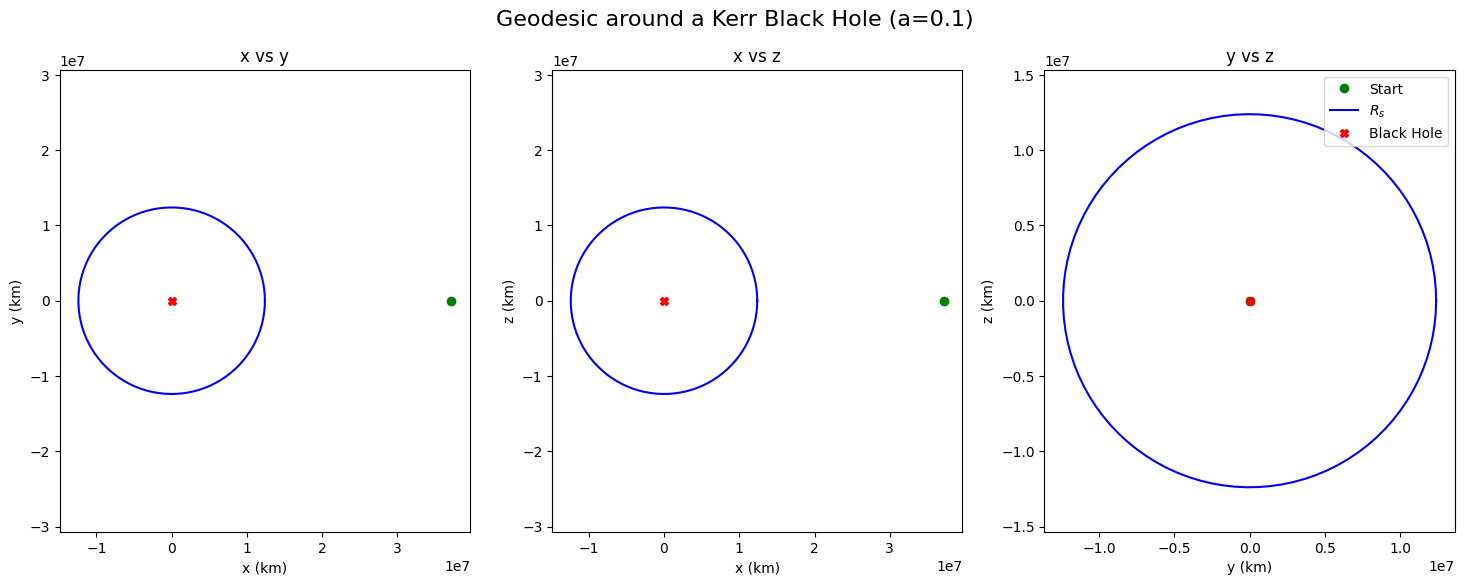

In [ ]:
plt_geodesic(*sol.y[:4], R_s=Rs, a=a)

In [ ]:
%reload_ext autoreload
%autoreload 2
from kerr_metric import Kerr
from kerrpy.numeric.geodesic.geodesic import Geodesic
import numpy as np

In [96]:
# mass_ = 4.2e6 * 1.989e30  # kg
mass_ = 1.9e30  # kg
a_ = 0.1  # adimensional

sagitario_a_star = Kerr(mass=mass_, a=a_)
sagitario_a_star.mass

1.9e+30

In [97]:
yr = 365 * 24 * 3600  # seconds

In [119]:
ys0 = cartesian_to_bl(a_, 
                      0, 1e11, 0, 0, 
                      0, 30000, 0)
P = 1 * yr
taus = np.linspace(0, P, 100)
path = sagitario_a_star.geodesic.get_path(ys0, taus)
print(ys0)
path.y.shape

[ 0.00000000e+00  1.00000000e+11  1.57079633e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  3.00000000e-07]


(7, 39)

In [120]:
path.y[0]

array([0.00000000e+00, 4.97194667e-39, 6.01605548e-37, 6.12593550e-35,
       6.13697819e-33, 6.13808299e-31, 6.13877141e-29, 2.57876299e-28,
       5.93913545e-28, 8.76803194e-28, 9.42172554e-28, 1.01142771e-27,
       1.07399185e-27, 1.07662067e-27, 1.07926707e-27, 1.08033144e-27,
       1.08139976e-27, 1.08355209e-27, 1.08398669e-27, 1.08399018e-27,
       1.08399367e-27, 1.08400066e-27, 1.08400206e-27, 1.08400211e-27,
       1.08400217e-27, 1.08400219e-27, 1.08400219e-27, 1.08400220e-27,
       1.08400221e-27, 1.08400221e-27, 1.08400221e-27, 1.08400221e-27,
       1.08400221e-27, 1.08400221e-27, 1.08400221e-27, 1.08400221e-27,
       1.08400221e-27, 1.08400221e-27, 1.08400221e-27])

In [121]:
path.y[3]

array([ 0.00000000e+00, -9.16905132e-16, -1.10945521e-13, -1.12971881e-11,
       -1.13175526e-09, -1.13195901e-07, -1.13262023e-05, -4.79649184e-05,
       -1.15191033e-04, -1.85268759e-04, -2.06299057e-04, -2.34062072e-04,
       -2.75984788e-04, -2.79394191e-04, -2.83501960e-04, -2.85470915e-04,
       -2.87757239e-04, -2.94840351e-04, -2.98895770e-04, -2.99006719e-04,
       -2.99135357e-04, -2.99529834e-04, -2.99730503e-04, -2.99749230e-04,
       -2.99774824e-04, -2.99790338e-04, -2.99794455e-04, -2.99799291e-04,
       -2.99815892e-04, -2.99817631e-04, -2.99820588e-04, -2.99821065e-04,
       -2.99821843e-04, -2.99821955e-04, -2.99822102e-04, -2.99822181e-04,
       -2.99822298e-04, -2.99822387e-04, -2.99822431e-04])

In [122]:
ys0

array([ 0.00000000e+00,  1.00000000e+11,  1.57079633e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.00000000e-07])

In [123]:
path.y.shape

(7, 39)

In [124]:
path.y[1]

array([1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11,
       1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11,
       1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11,
       1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11,
       1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11, 1.e+11])

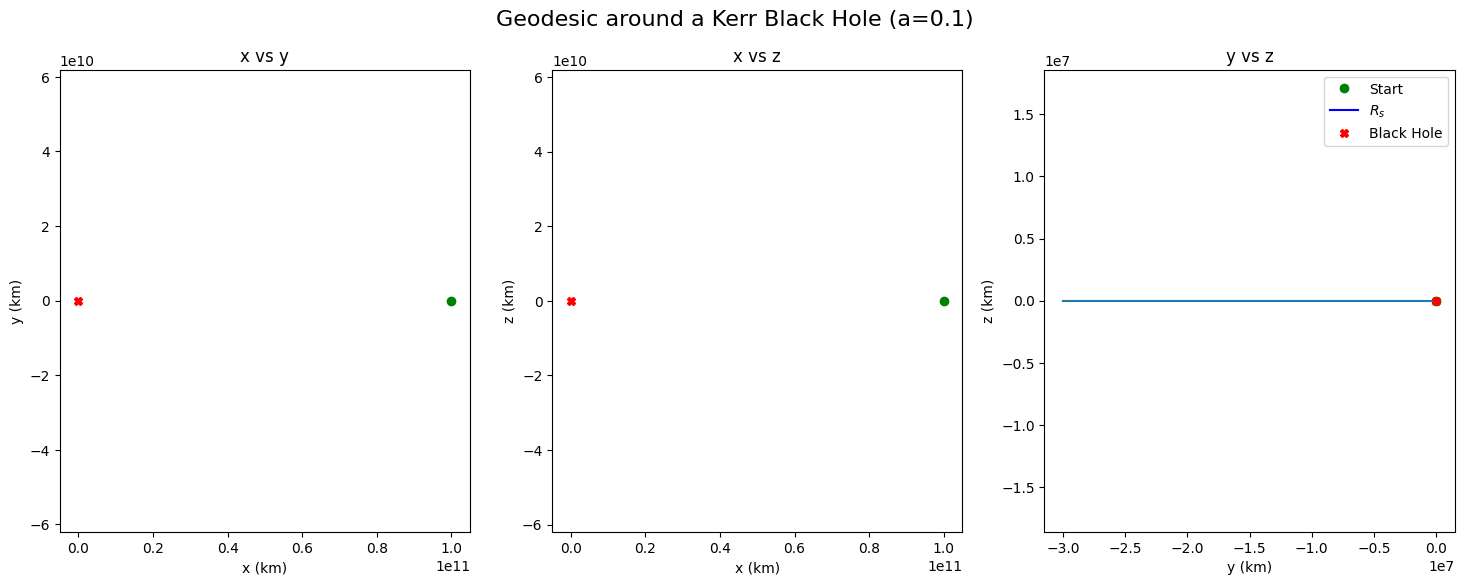

In [127]:
plt_geodesic(*path.y[:4], R_s=sagitario_a_star.R_s, a=sagitario_a_star.a)

In [152]:
M_sun = 1477
sun = Kerr(mass=M_sun, a=0.01)

In [153]:
path_earth = sun.geodesic.get_path(
    cartesian_to_bl(0.01, 0, 8*60, np.pi/2, 0, 0, 29.78, 0),  # Earth
    np.linspace(0, 24*3600, 10)  # 1 year
)

/home/lldddv/Documentos/UdeA/Trabajo_de_grado/kerrpy/notebooks/kerr_metric.py:13: RuntimeWarning: invalid value encountered in sqrt
  self.R_s = 2 * _G * self.mass / _c**2  # Schwarzschild radius


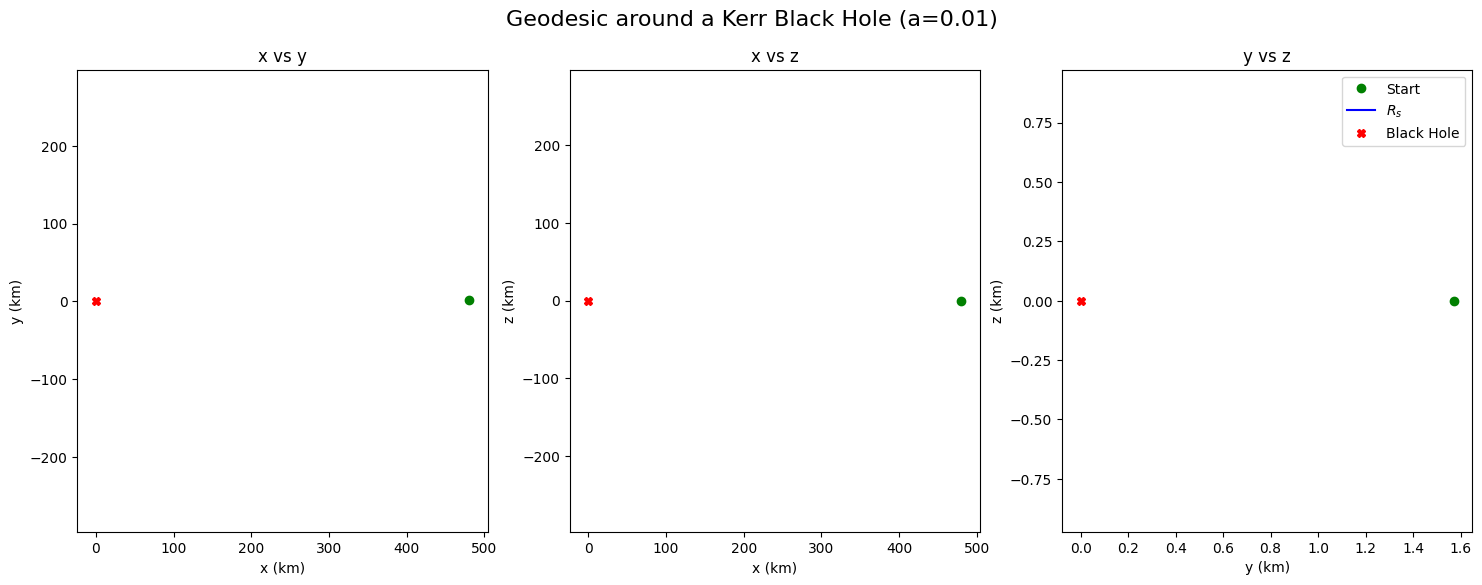

In [155]:
plt_geodesic(*path_earth.y[:4], R_s=sun.R_s, a=sun.a)